In [1]:
import tensorflow as tf
import numpy as np

In [2]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-snake-breed-detection/identify-the-snake-breed-5-66d9a9f5/8a95c26e1bab11eb.zip

--2022-08-12 03:30:29--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-snake-breed-detection/identify-the-snake-breed-5-66d9a9f5/8a95c26e1bab11eb.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.124.40
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.124.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100929731 (96M) [application/zip]
Saving to: ‘8a95c26e1bab11eb.zip’

8a95c26e1bab11eb.zi 100%[===================>]  96.25M  15.4MB/s    in 7.4s    

2022-08-12 03:30:37 (12.9 MB/s) - ‘8a95c26e1bab11eb.zip’ saved [100929731/100929731]



In [3]:
!unzip *.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/b70a166bfe.jpg  
  inflating: dataset/train/d31875b68e.jpg  
  inflating: dataset/train/22c66793fb.jpg  
  inflating: dataset/train/a468b1390f.jpg  
  inflating: dataset/train/9e43d2cedc.jpg  
  inflating: dataset/train/2e0299e991.jpg  
  inflating: dataset/train/e0b85d8ff1.jpg  
  inflating: dataset/train/6a651ec04a.jpg  
  inflating: dataset/train/46c87716a5.jpg  
  inflating: dataset/train/8c40d4f073.jpg  
  inflating: dataset/train/96e4fb744c.jpg  
  inflating: dataset/train/794a698960.jpg  
  inflating: dataset/train/dad1934f35.jpg  
  inflating: dataset/train/a1c66a2b3c.jpg  
  inflating: dataset/train/b62484a8e4.jpg  
  inflating: dataset/train/09462814f1.jpg  
  inflating: dataset/train/97dbdb4dd0.jpg  
  inflating: dataset/train/3bd7f56164.jpg  
  inflating: dataset/train/a2576a2fa1.jpg  
  inflating: dataset/train/f462f66aa6.jpg  
  inflating: dataset/train/740e1a7fca.jpg  
  inflating: dataset/trai

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [5]:
train_df = pd.read_csv('/content/dataset/train.csv')

In [6]:
train_df.head()

,image_id,breed
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix


In [7]:
train_df.columns=['filename','class']
train_df.head()

,filename,class
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix


In [8]:
from sklearn.model_selection import train_test_split

train = train_df.sample(frac = 0.9)
val = train_df.drop(train.index)

In [9]:
train.head()

,filename,class
4695,d01733a3b7,thamnophis-marcianus
3939,d32347af5f,pantherophis-obsoletus
3346,0546d081d7,crotalus-atrox
4894,8c40d4f073,pantherophis-alleghaniensis
2392,dfb24bd3a2,crotalus-viridis


In [10]:
train.shape

(4957, 2)

In [11]:
val.head()

,filename,class
0,a8b3ad1dde,nerodia-erythrogaster
11,d7c292df19,nerodia-sipedon
21,e433fefdae,crotalus-atrox
22,f59da20c0e,agkistrodon-piscivorus
27,20521de004,storeria-occipitomaculata


In [12]:
val.shape

(551, 2)

In [13]:
train['filename'] = '/content/dataset/train/' + train['filename']
train.head()

,filename,class
4695,/content/dataset/train/d01733a3b7,thamnophis-marcianus
3939,/content/dataset/train/d32347af5f,pantherophis-obsoletus
3346,/content/dataset/train/0546d081d7,crotalus-atrox
4894,/content/dataset/train/8c40d4f073,pantherophis-alleghaniensis
2392,/content/dataset/train/dfb24bd3a2,crotalus-viridis


In [14]:
val['filename'] = '/content/dataset/train/' + val['filename']
val.head()

,filename,class
0,/content/dataset/train/a8b3ad1dde,nerodia-erythrogaster
11,/content/dataset/train/d7c292df19,nerodia-sipedon
21,/content/dataset/train/e433fefdae,crotalus-atrox
22,/content/dataset/train/f59da20c0e,agkistrodon-piscivorus
27,/content/dataset/train/20521de004,storeria-occipitomaculata


In [15]:
train.shape

(4957, 2)

In [16]:
unique_features = train['class'].unique()
len(unique_features)

35

In [17]:
def append_ext(fn):
    return fn+".jpg"

train["filename"]=train["filename"].apply(append_ext)
train.head()

,filename,class
4695,/content/dataset/train/d01733a3b7.jpg,thamnophis-marcianus
3939,/content/dataset/train/d32347af5f.jpg,pantherophis-obsoletus
3346,/content/dataset/train/0546d081d7.jpg,crotalus-atrox
4894,/content/dataset/train/8c40d4f073.jpg,pantherophis-alleghaniensis
2392,/content/dataset/train/dfb24bd3a2.jpg,crotalus-viridis


In [18]:
def append_ext(fn):
    return fn+".jpg"

val["filename"]=val["filename"].apply(append_ext)
val.head()

,filename,class
0,/content/dataset/train/a8b3ad1dde.jpg,nerodia-erythrogaster
11,/content/dataset/train/d7c292df19.jpg,nerodia-sipedon
21,/content/dataset/train/e433fefdae.jpg,crotalus-atrox
22,/content/dataset/train/f59da20c0e.jpg,agkistrodon-piscivorus
27,/content/dataset/train/20521de004.jpg,storeria-occipitomaculata


In [19]:
sample_df = train.sample(16)
files = sample_df['filename'].tolist()
targets = sample_df['class'].tolist()

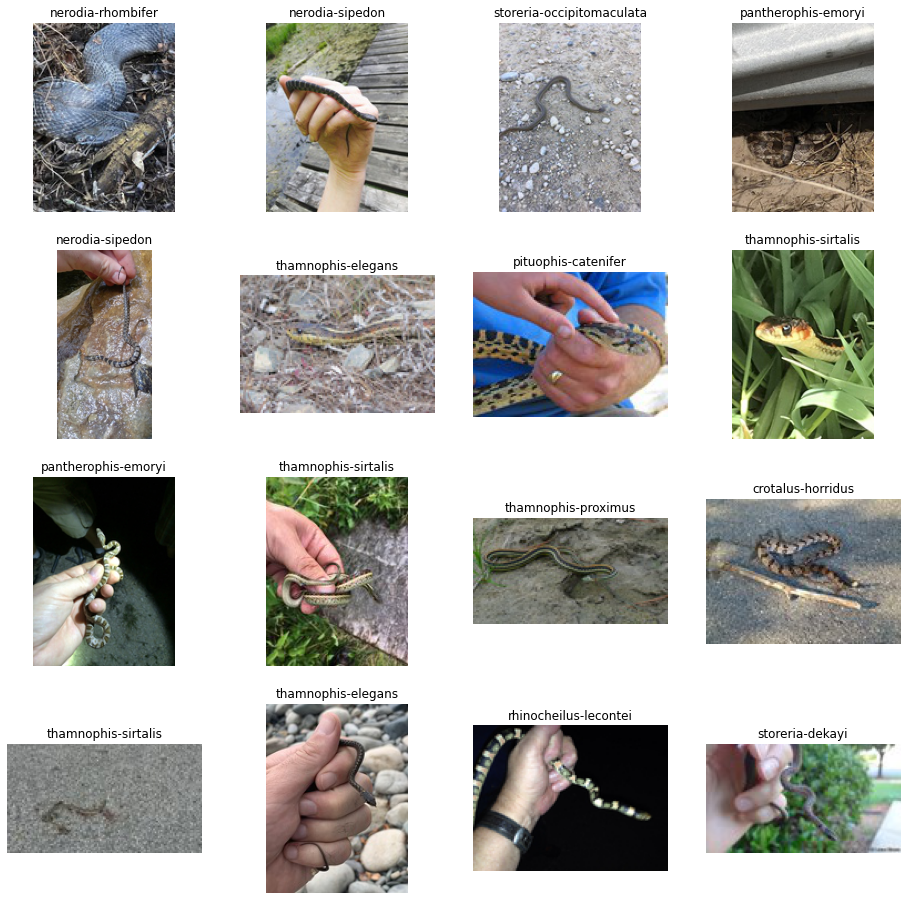

In [20]:
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(nrows * 4,nrows * 4)

for i, (img_path, targets) in enumerate(zip(files,targets)):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(targets)

plt.show()

In [21]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory='/content/dataset/train',
    target_size=(256,256),
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val,
    directory='/content/dataset/train',
    target_size=(256,256),
    class_mode='categorical'
)

Found 4957 validated image filenames belonging to 35 classes.
Found 551 validated image filenames belonging to 35 classes.


In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(256,256,3)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(unique_features), activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 128)               3

In [23]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.80):
            print("\nReached 80% accuracy -> training stopped")
            self.model.stop_training = True
        
callbacks = myCallback()

In [25]:
history = model.fit(train_generator, epochs=20, validation_data=val_generator,callbacks=[callbacks])

Epoch 1/20
155/155 [==============================] - 507s 3s/step - loss: 3.7419 - accuracy: 0.0712 - val_loss: 3.3738 - val_accuracy: 0.0907
Epoch 2/20
155/155 [==============================] - 500s 3s/step - loss: 3.4055 - accuracy: 0.0859 - val_loss: 3.4030 - val_accuracy: 0.0871
Epoch 3/20
155/155 [==============================] - 497s 3s/step - loss: 3.4033 - accuracy: 0.0886 - val_loss: 3.3730 - val_accuracy: 0.0871
Epoch 4/20
155/155 [==============================] - 497s 3s/step - loss: 3.3893 - accuracy: 0.0898 - val_loss: 3.3570 - val_accuracy: 0.0871
Epoch 5/20
155/155 [==============================] - 499s 3s/step - loss: 3.3845 - accuracy: 0.0906 - val_loss: 3.3590 - val_accuracy: 0.0871
Epoch 6/20
155/155 [==============================] - 496s 3s/step - loss: 3.3836 - accuracy: 0.0894 - val_loss: 3.3602 - val_accuracy: 0.0871
Epoch 7/20
155/155 [==============================] - 496s 3s/step - loss: 3.3846 - accuracy: 0.0894 - val_loss: 3.3594 - val_accuracy: 0.0871

In [26]:
model.evaluate(val_generator)

18/18 [==============================] - 13s 712ms/step - loss: 3.3118 - accuracy: 0.1198


[3.3117897510528564, 0.1197822168469429]

In [27]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

prob = model.predict(val_generator)
pred = np.argmax(prob, axis=1)

In [28]:
print(confusion_matrix(val_generator.classes, pred))

[[ 0  0  0 ...  0  0 10]
 [ 0  0  0 ...  0  0 17]
 [ 0  0  0 ...  0  0  7]
 ...
 [ 0  0  0 ...  0  0  7]
 [ 0  0  0 ...  0  0  4]
 [ 0  0  0 ...  0  0 41]]


In [29]:
print("F-1 Score=", np.round(f1_score(val_generator.classes, pred, average='weighted'), 3))

F-1 Score= 0.028


(256, 256, 3)
(1, 256, 256, 3)
(1, 254, 254, 32)
(1, 127, 127, 32)
(1, 125, 125, 64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


(1, 62, 62, 64)


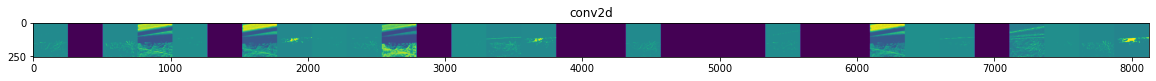

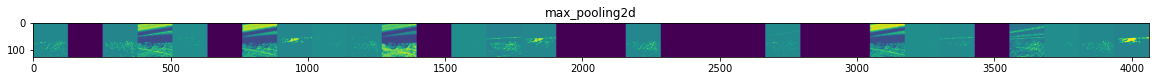

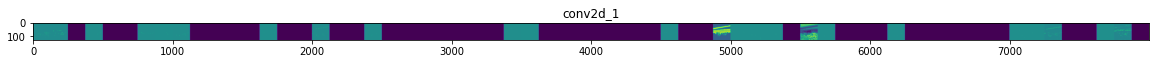

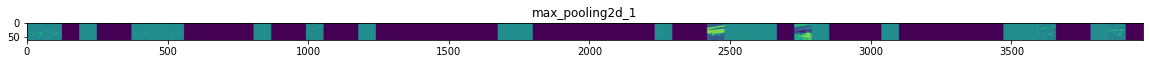

In [30]:
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = tf.keras.preprocessing.image.load_img(files[3], target_size=(256, 256) )
x=tf.keras.preprocessing.image.img_to_array(img)
print(x.shape)
x=x.reshape ((1, ) + x.shape)
print (x.shape)
x/=255
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len (feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    print(feature_map.shape)
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x= feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype ('uint8')
      display_grid[:, i*size : (i + 1) * size] = x
    scale =20. /n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [31]:
labels = dict((v,k) for k,v in train_generator.class_indices.items())
labels

{0: 'agkistrodon-contortrix',
 1: 'agkistrodon-piscivorus',
 2: 'coluber-constrictor',
 3: 'crotalus-atrox',
 4: 'crotalus-horridus',
 5: 'crotalus-ruber',
 6: 'crotalus-scutulatus',
 7: 'crotalus-viridis',
 8: 'diadophis-punctatus',
 9: 'haldea-striatula',
 10: 'heterodon-platirhinos',
 11: 'lampropeltis-californiae',
 12: 'lampropeltis-triangulum',
 13: 'masticophis-flagellum',
 14: 'natrix-natrix',
 15: 'nerodia-erythrogaster',
 16: 'nerodia-fasciata',
 17: 'nerodia-rhombifer',
 18: 'nerodia-sipedon',
 19: 'opheodrys-aestivus',
 20: 'pantherophis-alleghaniensis',
 21: 'pantherophis-emoryi',
 22: 'pantherophis-guttatus',
 23: 'pantherophis-obsoletus',
 24: 'pantherophis-spiloides',
 25: 'pantherophis-vulpinus',
 26: 'pituophis-catenifer',
 27: 'rhinocheilus-lecontei',
 28: 'storeria-dekayi',
 29: 'storeria-occipitomaculata',
 30: 'thamnophis-elegans',
 31: 'thamnophis-marcianus',
 32: 'thamnophis-proximus',
 33: 'thamnophis-radix',
 34: 'thamnophis-sirtalis'}

In [32]:
pred_labels = [] 
actuals = []
pred = np.argmax(model.predict(val_generator), axis=1)
for i in range(551):
    pred_labels.append(labels[pred[i]])
    actuals.append(labels[val_generator.classes[i]])

In [33]:
val_df = pd.DataFrame(columns=['file', 'pred_labels', 'actuals'])
val_df['file'] = val_generator.filenames
val_df['pred_labels'] = pred_labels
val_df['actuals'] = actuals
val_df.head()

,file,pred_labels,actuals
0,/content/dataset/train/a8b3ad1dde.jpg,storeria-dekayi,nerodia-erythrogaster
1,/content/dataset/train/d7c292df19.jpg,thamnophis-sirtalis,nerodia-sipedon
2,/content/dataset/train/e433fefdae.jpg,thamnophis-sirtalis,crotalus-atrox
3,/content/dataset/train/f59da20c0e.jpg,crotalus-atrox,agkistrodon-piscivorus
4,/content/dataset/train/20521de004.jpg,storeria-dekayi,storeria-occipitomaculata


In [34]:
sample = pd.DataFrame(val_df.sample(10))

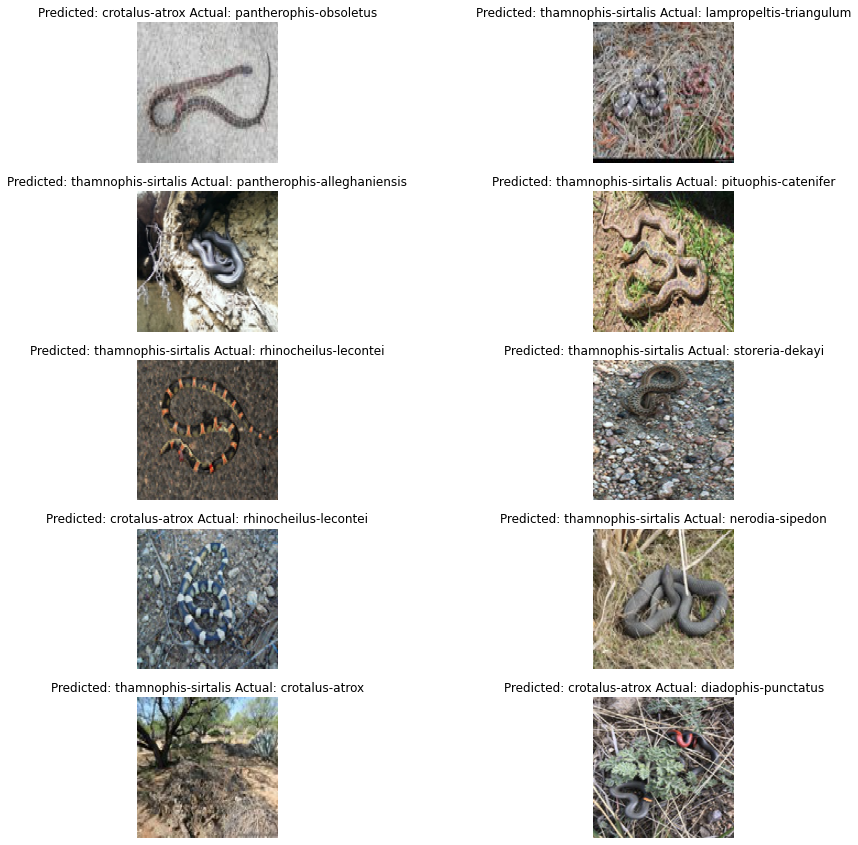

In [35]:
j=1
plt.figure(figsize=(15,15))
for i in sample.index:

  plt.subplot(5, 2, j)
  img = tf.keras.preprocessing.image.load_img(sample['file'][i], target_size = (256, 256))
  plt.imshow(img)
  plt.axis("off")
  plt.title("Predicted: " + val_df['pred_labels'][i] + " Actual: " + val_df['actuals'][i])
  j+=1